#### Product Price Recommendation of E-commerce Data

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('E-commerce_data.csv',encoding='unicode_escape')
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.dropna(subset=['CustomerID'],axis = 0, inplace=True)

In [7]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df.shape

(406829, 8)

In [9]:
df['Date'] = pd.to_datetime(df['InvoiceDate'])
df['Month-Year'] = df['Date'].dt.strftime('%b-%Y')
df.drop(['InvoiceDate','Date'],axis=1,inplace=True)

In [10]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

   UnitPrice  CustomerID         Country Month-Year  
0       2.55     17850.0  United Kingdom   Dec-2010  
1       3.39     17850.0  United Kingdom   Dec-2010  
2       2.75     17850.0  United Kingdom   Dec-2010  
3       3.39     17850.0  United Kingdom   Dec-2010  
4       3.39     17850.0  United Kingdom   Dec-2010

In [11]:
df_dq = df.groupby('Description')['Quantity'].sum().reset_index()
df_dq.columns = ['Description', 'Total Quantity']
df_dq

Description  Total Quantity
0        4 PURPLE FLOCK DINNER CANDLES             140
1        50'S CHRISTMAS GIFT BAG LARGE            1883
2                    DOLLY GIRL BEAKER            2391
3          I LOVE LONDON MINI BACKPACK             360
4          I LOVE LONDON MINI RUCKSACK               1
...                                ...             ...
3891   ZINC T-LIGHT HOLDER STARS SMALL            4850
3892    ZINC TOP  2 DOOR WOODEN SHELF                5
3893  ZINC WILLIE WINKIE  CANDLE STICK            2595
3894       ZINC WIRE KITCHEN ORGANISER              25
3895  ZINC WIRE SWEETHEART LETTER TRAY              80

[3896 rows x 2 columns]

In [12]:
df_dq15 = df_dq.nlargest(10, 'Total Quantity')
df_dq15

Description  Total Quantity
3805   WORLD WAR 2 GLIDERS ASSTD DESIGNS           53215
1771             JUMBO BAG RED RETROSPOT           45066
217        ASSORTED COLOUR BIRD ORNAMENT           35314
3716  WHITE HANGING HEART T-LIGHT HOLDER           34147
2279     PACK OF 72 RETROSPOT CAKE CASES           33409
2612                      POPCORN HOLDER           30504
2669                  RABBIT NIGHT LIGHT           27094
2057             MINI PAINT SET VINTAGE            25880
2245          PACK OF 12 LONDON TISSUES            25321
2277  PACK OF 60 PINK PAISLEY CAKE CASES           24163

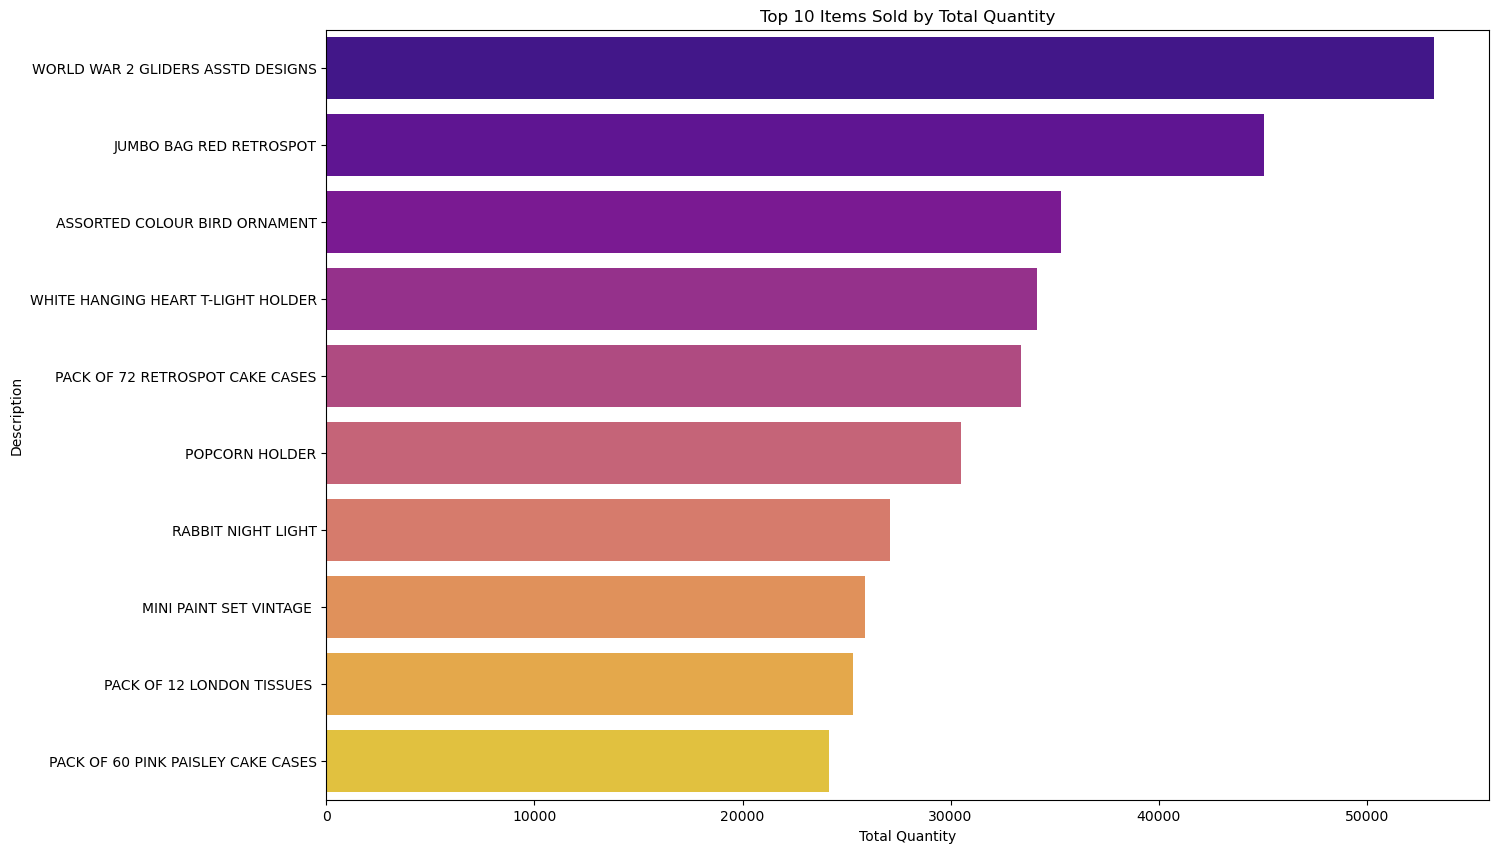

In [13]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df_dq15, x="Total Quantity", y="Description", capsize=3, palette="plasma")
plt.title("Top 10 Items Sold by Total Quantity")
plt.xlabel("Total Quantity")
plt.ylabel("Description")
plt.show()

In [14]:
df['Total Price'] = df['UnitPrice'] * df['Quantity']
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

   UnitPrice  CustomerID         Country Month-Year  Total Price  
0       2.55     17850.0  United Kingdom   Dec-2010        15.30  
1       3.39     17850.0  United Kingdom   Dec-2010        20.34  
2       2.75     17850.0  United Kingdom   Dec-2010        22.00  
3       3.39     17850.0  United Kingdom   Dec-2010        20.34  
4       3.39     17850.0  United Kingdom   Dec-2010        20.34

C:\Users\Admin\AppData\Local\Temp\ipykernel_17656\214001900.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='magma', annot=True, fmt=".2f")


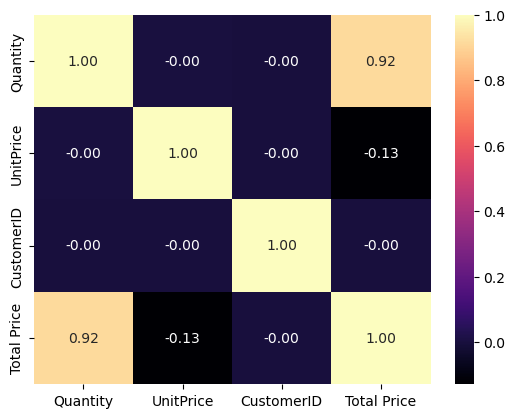

In [15]:
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt=".2f")
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['StockCode_Encode'] = le.fit_transform(df['StockCode'])
df['Invoice_Encode'] = le.fit_transform(df['InvoiceNo'])

In [17]:
X = df.drop(columns=['InvoiceNo','StockCode','Total Price','Month-Year','Description','CustomerID','Country'])
y = df['Total Price']

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)

(325463, 4)
(81366, 4)


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

tree= DecisionTreeRegressor(random_state=10) # using the random state for reproducibility
knn= KNeighborsRegressor(n_neighbors=5,metric='euclidean')
#svm= SVR(kernel="rbf", gamma=0.1, C=1)
rfr= RandomForestRegressor(random_state=42)

In [22]:
models=[tree,knn,rfr]

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

for model in models:
    model.fit(X_train, y_train) # fit the model
    y_pred= model.predict(X_test) # then predict on the test set
    r2=r2_score(y_test, y_pred)
    print(type(model).__name__)
    print(y_pred)
    print("The R2score of the ",type(model).__name__, " model is ", r2*100 )
    print("\n")

DecisionTreeRegressor
[15.9  15.8  -3.4  ...  5.04  1.68  8.5 ]
The R2score of the  DecisionTreeRegressor  model is  44.68041788164553


KNeighborsRegressor
[11.13  13.43  -5.3   ... 13.008  1.506 17.   ]
The R2score of the  KNeighborsRegressor  model is  26.811337014558


RandomForestRegressor
[15.9    15.8    -3.3976 ...  5.04    1.68    8.5   ]
The R2score of the  RandomForestRegressor  model is  60.61492805039372


